In [1]:
%%time
# This is the important part
import psi4
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

CPU times: user 737 ms, sys: 272 ms, total: 1.01 s
Wall time: 11.4 s


In [2]:
%%time
#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')


  Memory set to 476.837 MiB by Python driver.

Scratch directory: /tmp/

*** tstart() called on gv003.hpc.nyu.edu
*** at Mon Dec 19 16:02:16 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                

-76.0266327350902

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A1        11      11 
     A2         2       2 
     B1         4       4 
     B2         7       7 
   -------------------------
    Total      24      24
   -------------------------

  ==> Iterations <==

                           Total Energy        Delta E     RMS |[F,P]|



In [3]:
%%time
# Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

   @DF-RHF iter SAD:   -75.50772041125677   -7.55077e+01   0.00000e+00 
   @DF-RHF iter   1:   -75.95376270516475   -4.46042e-01   3.03066e-02 ADIIS/DIIS
   @DF-RHF iter   2:   -76.00706363301668   -5.33009e-02   1.73566e-02 ADIIS/DIIS
   @DF-RHF iter   3:   -76.02603257829324   -1.89689e-02   2.30937e-03 ADIIS/DIIS
   @DF-RHF iter   4:   -76.02661197956323   -5.79401e-04   3.72696e-04 ADIIS/DIIS
   @DF-RHF iter   5:   -76.02663177626309   -1.97967e-05   6.75689e-05 DIIS
   @DF-RHF iter   6:   -76.02663270891105   -9.32648e-07   1.05815e-05 DIIS
   @DF-RHF iter   7:   -76.02663273457695   -2.56659e-08   1.47100e-06 DIIS
   @DF-RHF iter   8:   -76.02663273509020   -5.13253e-10   3.44832e-07 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1   -20.550924     2A1    -1.335311     1B2    -0.697803  
       3A1    -0.566087     1B1 

-38.92533462893707

In [4]:
%%time
# Optimize Hartree-Fock calculation of water molecule
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)


Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on gv003.hpc.nyu.edu
*** at Mon Dec 19 16:02:17 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y        

-76.02703272937481

--------------------------------------- ~
   Step         Total Energy             Delta E       MAX Force       RMS Force        MAX Disp        RMS Disp  ~
  --------------------------------------------------------------------------------------------------------------- ~
      1     -76.026632735124    -76.026632735124      0.01523518      0.01245755      0.02742222      0.02277529  ~
      2     -76.027022666023     -0.000389930899      0.00178779      0.00142945      0.01008136      0.00594927  ~
      3     -76.027032729375     -0.000010063352      0.00014019      0.00008488      0.00077463      0.00044738  ~
  --------------------------------------------------------------------------------------------------------------- ~

	Writing optimization data to binary file.
	Final energy is    -76.0270327293748
	Final (previous) structure:
	Cartesian Geometry (in Angstrom)
	    O     0.0000000000   0.0000000000  -0.0647162893
	    H     0.0000000000  -0.7490459964   0.5135472375
	    H   

In [5]:
%%time
# Compute harmonic vibrational frequency of water molecule
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

	Removing binary optimization data file.
	Cleaning optimization helper files.

Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on gv003.hpc.nyu.edu
*** at Mon Dec 19 16:02:18 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge =

In [6]:
%%time
# Analysis of intermolecular interactions
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

# Computation options of ethene*ethyne
psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)


Scratch directory: /tmp/
  SAPT does not make use of molecular symmetry, further calculations in C1 point group.
   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //              Dimer HF             //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


*** tstart() called on gv003.hpc.nyu.edu
*** at Mon Dec 19 16:02:19 2022

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    

-0.0022355823909805178

In [7]:
%%time
#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

In [8]:
%%time
#! Example potential energy surface scan and CP-correction for Ar2

ar2_geometry = """
0 1
Ar
--
Ar 1 {0}
symmetry c1
"""

Rvals = np.arange(3.5,6.1,0.1)

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

721    0.015721    0.086594

    Iterations converged.


    Largest TIA Amplitudes:
              6  28        -0.0147040011
              7  32        -0.0147040011
              2  10        -0.0143472779
              3  14        -0.0143472779
              1   0         0.0118734147
              5  21         0.0111260810
              1   1        -0.0097972800
              5  20        -0.0078399279
              4  20         0.0056418460
              0   1         0.0050068998

    Largest TIjAb Amplitudes:
      2   2  34  34        -0.0170166992
      3   3  30  30        -0.0170166992
      6   6  30  30        -0.0170099610
      7   7  34  34        -0.0170099610
      5   5   4   4        -0.0169007192
      1   1   4   4        -0.0168557771
      2   7  12  34        -0.0168463784
      3   6  16  30        -0.0168463784
      6   3  30  16        -0.0168463784
      7   2  34  12        -0.0168463784

    SCF energy       (wfn)                    = -256.9927325414

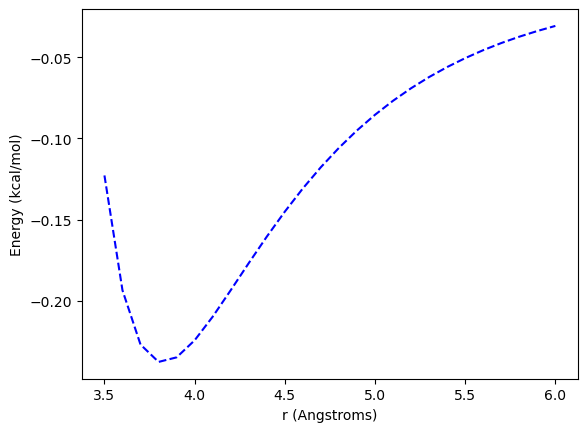

In [9]:
# fitting computed energies to LJ potential

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )

#LJ parameters for Ar
sigma = 3.405
eps = 0.238

#plot LJ curve
y = []
for r in Rvals:
    y.append(lj(r, sigma, eps))

plt.plot(Rvals, y, 'b--')
plt.xlabel('r (Angstroms)')
plt.ylabel('Energy (kcal/mol)')
plt.show()

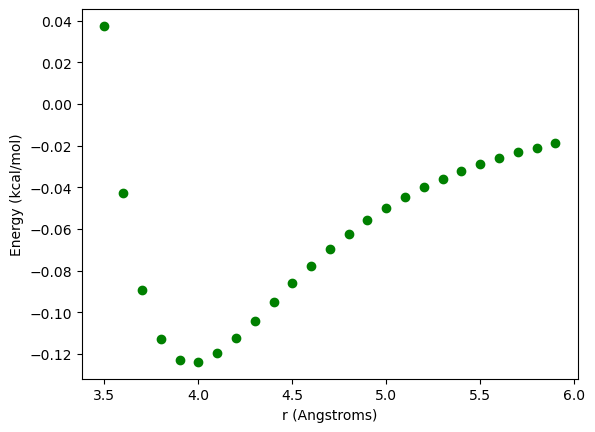

In [13]:
# plot data
# create dictionary of energy values
energy = [0.037518, -0.042931, -0.089134, -0.113090, -0.122889, -0.123921, -0.119738, -0.112653, -0.104147,
         -0.095152, -0.086237, -0.077730, -0.069808, -0.062548, -0.055968, -0.050050, -0.044753, -0.040031, -0.035830,
         -0.032100, -0.028789, -0.025853, -0.023248, -0.020936, -0.018882]

plt.plot(Rvals[0:-1], energy, 'go')
plt.xlabel('r (Angstroms)')
plt.ylabel('Energy (kcal/mol)')
plt.show()



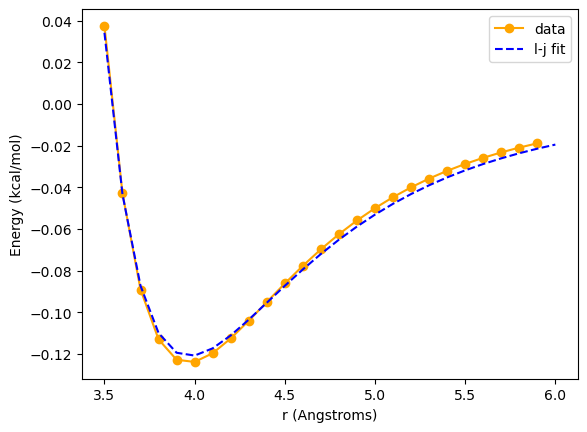

In [15]:
popt, pcov = curve_fit(lj, Rvals[0:-1], energy)

plt.plot(Rvals[0:-1], energy, color='orange', marker='o', label = 'data')

plt.plot(Rvals, lj(Rvals, *popt), 'b--', label='l-j fit')

plt.xlabel('r (Angstroms)')
plt.ylabel('Energy (kcal/mol)')
plt.legend()
plt.show()